In [17]:
#Step 0: Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans


In [ ]:
#Step 1: Load data
url =  'https://breathecode.herokuapp.com/asset/internal-link?id=809&path=housing.csv'
df_raw = pd.read_csv(url)
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [7]:
df_raw.sample(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
6896,3.6625,32.0,4.766414,0.992424,2416.0,3.050505,34.05,-118.12,2.47600
8220,2.1964,44.0,4.033333,0.966667,153.0,5.100000,33.79,-118.21,1.50000
8850,15.0001,37.0,9.333333,1.037801,809.0,2.780069,34.09,-118.41,5.00001
844,6.5116,16.0,6.157303,0.940075,1033.0,3.868914,37.58,-122.07,2.44300
17736,5.0543,21.0,6.760925,1.146530,1789.0,4.598972,37.31,-121.80,2.32000
14068,2.1597,23.0,4.137346,1.106481,1279.0,1.973765,32.76,-117.12,1.16100
2366,3.6161,11.0,5.640449,1.033708,1248.0,2.804494,36.72,-119.57,0.99500
2927,1.0560,24.0,4.462069,1.112644,1277.0,2.935632,35.36,-119.01,0.51600
18187,4.0911,43.0,3.786787,0.951952,836.0,2.510511,37.38,-122.02,2.24600
9102,3.9766,8.0,5.628433,1.045234,2169.0,3.504039,34.53,-117.90,1.35800


In [33]:
#Step 2: Preprocessing
df_baking = df_raw.copy()
df_baking.columns = df_baking.columns.str.lower()
df_baking = df_baking[['medinc', 'latitude', 'longitude']]
df = df_baking

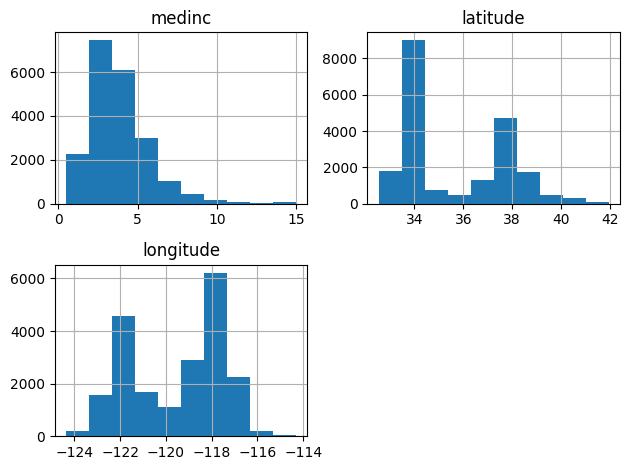

In [34]:
#Step 3: EDA
df.hist()
plt.tight_layout()
plt.show()

In [35]:
scaler = MinMaxScaler()
df_sc = scaler.fit_transform(df)
df_sc = pd.DataFrame(df_sc, columns=df.columns)

In [36]:
inertia = []
K = range(1,10)

for k in K:
  k_means=KMeans(n_clusters=k)
  k_means.fit(df_sc)
  inertia.append(k_means.inertia_)

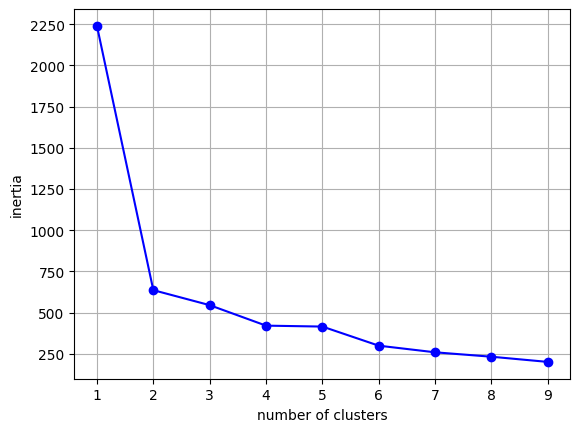

In [37]:
plt.plot(K, inertia, 'bo-')
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.grid(True)
plt.show()

In [38]:
clu_kmeans = KMeans(n_clusters=2)
clu_kmeans.fit(df_sc)

,n_clusters,2
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [39]:
labels = clu_kmeans.labels_
df_clustered = df_sc

df_clustered['cluster'] = labels

In [41]:
df_clustered

,medinc,latitude,longitude,cluster
0,0.539668,0.567481,0.211155,0
1,0.538027,0.565356,0.212151,0
2,0.466028,0.564293,0.210159,0
3,0.354699,0.564293,0.209163,0
4,0.230776,0.564293,0.209163,0
...,...,...,...,...
20635,0.073130,0.737513,0.324701,0
20636,0.141853,0.738576,0.312749,0
20637,0.082764,0.732200,0.311753,0
20638,0.094295,0.732200,0.301793,0


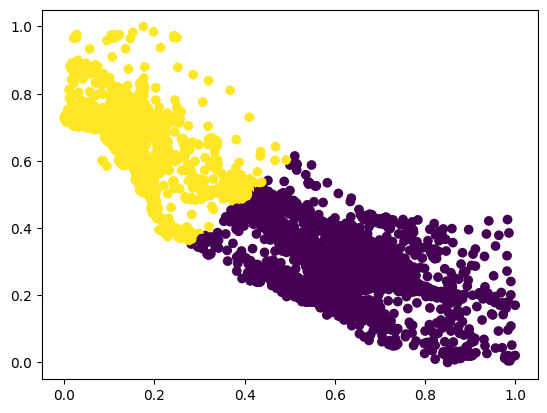

In [43]:
plt.scatter(x=df_clustered['latitude'], y=df_clustered['longitude'], c=df_clustered['cluster'])
plt.show()